<a href="https://colab.research.google.com/github/YBilodeau/Metabolic-Syndrome-Prediction-Project/blob/main/Prediction_of_Metabolic_Syndrome_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction of Metabolic Syndrome Using Machine Learning**


- Yvon Bilodeau
- March 2022



---



### **Project Description**


**Goal**

The goal of this project is to predict the presence of metabolic syndrome, yes or no, based on common risk factors utilizing categorical machine learning.

**Metabolic Syndrome Diagnosis**

The National Institutes of Health guidelines define metabolic syndrome as 
"a group of conditions that together raise your risk of coronary heart disease, diabetes, stroke, and other serious health problems. Metabolic syndrome is also called insulin resistance syndrome"

 - Source - [The National Institutes of Health](https://www.nhlbi.nih.gov/health/metabolic-syndrome#:~:text=Metabolic%20syndrome%20is%20a%20group,more%20of%20the%20following%20conditions.)

"The National Institutes of Health guidelines define metabolic syndrome as having three or more of the following traits, including traits for which you may be taking medication to control:

- **Large waist** — A waistline that measures at least 35 inches (89 centimeters) for women and 40 inches (102 centimeters) for men
- **High triglyceride level** — 150 milligrams per deciliter (mg/dL), or 1.7 millimoles per liter (mmol/L), or higher of this type of fat found in blood
- **Reduced "good" or HDL cholesterol** — Less than 40 mg/dL (1.04 mmol/L) in men or less than 50 mg/dL (1.3 mmol/L) in women of high-density lipoprotein (HDL) cholesterol
- **Increased blood pressure** — 130/85 millimeters of mercury (mm Hg) or higher
- **Elevated fasting blood sugar** — 100 mg/dL (5.6 mmol/L) or higher"

"Having just one of these conditions doesn't mean you have metabolic syndrome. But it does mean you have a greater risk of serious disease. And if you develop more of these conditions, your risk of complications, such as type 2 diabetes and heart disease, rises even higher.


Metabolic syndrome is increasingly common, and up to one-third of U.S. adults have it. If you have metabolic syndrome or any of its components, aggressive lifestyle changes can delay or even prevent the development of serious health problems."

 - Source - [Mayo Clinic](https://www.mayoclinic.org/diseases-conditions/metabolic-syndrome/symptoms-causes/syc-20351916?utm_source=Google&utm_medium=abstract&utm_content=Metabolic-syndrome&utm_campaign=Knowledge-panel)

**Benefit of Early Diagnosis and Treatment**

"The main goals of treating metabolic syndrome are to lower your risk of heart disease and to prevent type 2 diabetes if it hasn’t already developed. If you already have type 2 diabetes, treatment can lower your risk of heart disease by controlling all your risk factors.

Heart-healthy lifestyle changes are the first line of treatment for metabolic syndrome. You may have to see a dietitian and a physical therapist to help find a diet and exercise plan that works for you. If healthy lifestyle changes do not work, you may need medicines or weight loss surgery."
- Source - [The Mayo Clinic](https://www.nhlbi.nih.gov/health/metabolic-syndrome/treatment)

**Source of data**



The dataset was aquired from [Data World](https://data.world/informatics-edu/metabolic-syndrome-prediction). They aquired the data for this analysis from the [NHANES](https://www.cdc.gov/nchs/nhanes/index.htm), National Health and Nutrition Examination initiative, in which several features were combined from multiple tables.



The dataset consists of 2401 rows, and 15 columns.The rows represent 2401 observations, and the columns represent 14 features and 1 target variable.

| Feature         | Description  |
| --------------  | ------------ | 
| seqn            | Respondent sequence number | 
| Age             | Age in Years | 
| Sex             | Male or Female | 
| Marital         | Marital status | 
| Income          | Income in Dollars | 
| Race            | Racial Group | 
| WaistCirc       | Waist Circumference (cm)| 
| BMI             | Body Mass Index (kg/m**2) | 
| Albuminuria     | Albumin in Urine (mg/L)) | 
| UrAlbCr         | Ratio of Albumin (mcg/L) to Creatinine (mg/L) in Urine | 
| UricAcid        | Uric Acid in Blood (mg/dl) | 
| BloodGlucose    | Glucose in Blood (mg/dL) | 
| HDL             | High Density Lipoprotein (mg/dl) | 
| Triglycerides   | Triglycerides in Blood (mg/dL) | 
| MetabolicSyndrome | Presence or not of at least three of the five metabolic risk factors | 



## **Mount Data | Import Libraries | Load the Dataset**

### **Mount Google Drive**

In [3]:
# Mount Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Import Libraries**

In [107]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import missingno as msno

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config

# Dummy Classifier
from sklearn.dummy import DummyClassifier

# Linear Regression Classifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

# Import accuracy, precision, recall, classification report, and confusion matrix scoring functions
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Import Hypertuning GridSearch
from sklearn.model_selection import GridSearchCV

### **Load the Dataset**

- Data downloaded from [link](https://data.world/informatics-edu/metabolic-syndrome-prediction/file/Metabolic%20%20Syndrome.csv).

In [5]:
# Load the dataset.
filename = "/content/drive/MyDrive/Colab Notebooks/CodingDojo/000 Data Files/Metabolic  Syndrome.csv"
df = pd.read_csv(filename)

## **Inspect the Data**

### Display the Row and Column Count

In [6]:
# Display the number of rows and columns for the dataframe.
df.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')
print(f'The rows represent {df.shape[0]} observations, and the columns represent {df.shape[1]-1} features and 1 target variable.')

There are 2401 rows, and 15 columns.
The rows represent 2401 observations, and the columns represent 14 features and 1 target variable.


### Display Data Types

In [7]:
# Display the column names and datatypes for each column.
# Columns with mixed datatypes are identified as an object datatype.
df.dtypes

seqn                   int64
Age                    int64
Sex                   object
Marital               object
Income               float64
Race                  object
WaistCirc            float64
BMI                  float64
Albuminuria            int64
UrAlbCr              float64
UricAcid             float64
BloodGlucose           int64
HDL                    int64
Triglycerides          int64
MetabolicSyndrome     object
dtype: object

### Display Column Names, Count of Non-Null Values, and Data Types

In [8]:
# Display the column names, count of non-null values, and their datatypes.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seqn               2401 non-null   int64  
 1   Age                2401 non-null   int64  
 2   Sex                2401 non-null   object 
 3   Marital            2193 non-null   object 
 4   Income             2284 non-null   float64
 5   Race               2401 non-null   object 
 6   WaistCirc          2316 non-null   float64
 7   BMI                2375 non-null   float64
 8   Albuminuria        2401 non-null   int64  
 9   UrAlbCr            2401 non-null   float64
 10  UricAcid           2401 non-null   float64
 11  BloodGlucose       2401 non-null   int64  
 12  HDL                2401 non-null   int64  
 13  Triglycerides      2401 non-null   int64  
 14  MetabolicSyndrome  2401 non-null   object 
dtypes: float64(5), int64(6), object(4)
memory usage: 281.5+ KB


### Display First (10) Rows

In [9]:
# Display the first (10) rows of the dataframe.
df.head(10)

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,No MetSyn
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,No MetSyn
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,No MetSyn
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,No MetSyn
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,No MetSyn
5,62178,80,Male,Widowed,300.0,White,112.5,28.5,0,9.79,4.8,105,47,100,No MetSyn
6,62184,26,Male,Single,9000.0,Black,78.6,22.1,0,9.21,5.4,87,61,40,No MetSyn
7,62189,30,Female,Married,6200.0,Asian,80.2,22.4,0,8.78,6.7,83,48,91,No MetSyn
8,62191,70,Male,Divorced,1000.0,Black,NaN,NaN,1,45.67,5.4,96,35,75,No MetSyn
9,62195,35,Male,NaN,2500.0,Black,99.0,28.2,0,2.21,6.7,94,46,86,No MetSyn


- Data appears to have loaded correctly.

## **Clean the Data**

In [10]:
# Display the descriptive statistics for the numeric columns.
df.describe()

,seqn,Age,Income,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides
count,2401.000000,2401.000000,2284.000000,2316.000000,2375.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000
mean,67030.674302,48.691795,4005.253940,98.307254,28.702189,0.154102,43.626131,5.489046,108.247813,53.369429,128.125364
std,2823.565114,17.632852,2954.032186,16.252634,6.662242,0.422780,258.272829,1.439358,34.820657,15.185537,95.322477
min,62161.000000,20.000000,300.000000,56.200000,13.400000,0.000000,1.400000,1.800000,39.000000,14.000000,26.000000
25%,64591.000000,34.000000,1600.000000,86.675000,24.000000,0.000000,4.450000,4.500000,92.000000,43.000000,75.000000
50%,67059.000000,48.000000,2500.000000,97.000000,27.700000,0.000000,7.070000,5.400000,99.000000,51.000000,103.000000
75%,69495.000000,63.000000,6200.000000,107.625000,32.100000,0.000000,13.690000,6.400000,110.000000,62.000000,150.000000
max,71915.000000,80.000000,9000.000000,176.000000,68.700000,2.000000,5928.000000,11.300000,382.000000,156.000000,1562.000000


In [11]:
# Display the descriptive statistics for the non-numeric columns.
df.describe(exclude="number")

,Sex,Marital,Race,MetabolicSyndrome
count,2401,2193,2401,2401
unique,2,5,6,2
top,Female,Married,White,No MetSyn
freq,1211,1192,933,1579


### **Remove Unnecessary Columns**

#### **seqn column**

In [12]:
# Display the count of unique values and the cardinlity for this column.
unique_values = df.shape[0]
cardinality = (df['seqn'].value_counts().sum())/(df.shape[0])*100
print(f'This column has {unique_values} unique values which is {cardinality}% cardinality.')

This column has 2401 unique values which is 100.0% cardinality.


- This column will not contribute to predictability and so may be removed.

In [13]:
# Drop the column.
df.drop(columns = ['seqn'], inplace=True)

- Confirm column has been dropped.

In [14]:
# Display the first (5) rows of the dataframe.
df.head()

,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,No MetSyn
1,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,No MetSyn
2,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,No MetSyn
3,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,No MetSyn
4,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,No MetSyn


### **Remove Unecessary Rows**

In [15]:
# Count the number of duplicate rows.
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


- No duplicates were found or dropped.

### **Missing Values**

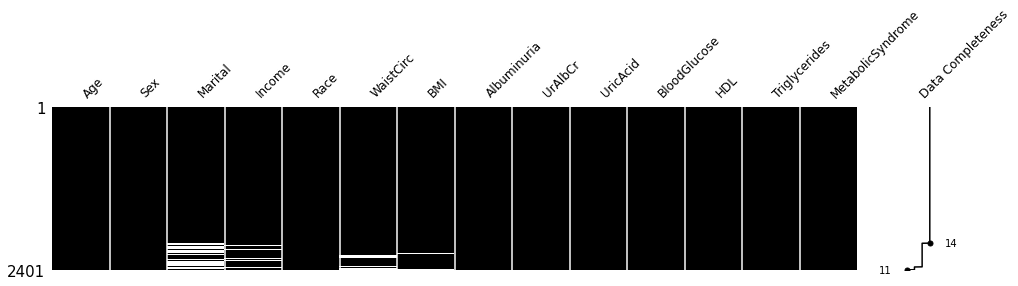

In [16]:
# Display missing values by column.
msno.matrix(df, figsize=(16,3), labels=True, fontsize=12, sort="descending", color=(0,0,0));

In [17]:
# Display the count of missing values by column.
print(df.isna().sum())

Age                    0
Sex                    0
Marital              208
Income               117
Race                   0
WaistCirc             85
BMI                   26
Albuminuria            0
UrAlbCr                0
UricAcid               0
BloodGlucose           0
HDL                    0
Triglycerides          0
MetabolicSyndrome      0
dtype: int64


- 'Marital', 'Income', 'WaistCirc' and 'BMI' columns have missing values.

#### **Statistics Function**

In [18]:
# Creates a function to display supplemental statistics
def column_statistics(column_name, max_unique_values_to_disply=20):
    # Display the count of missing values for this column.
    print(f'Missing Values: {df[column_name].isna().sum()} ({round((df[column_name].isna().sum())/(df.shape[0])*100,1)})%')

    # Determine Outliers - Only if this is a numeric column
    if (df[column_name].dtype == 'int64') | (df[column_name].dtype == 'float64'):
        # Create outlier filters
        q1 = df[column_name].quantile(0.25) # 25th percentile
        q3 = df[column_name].quantile(0.75) # 75th percentile
        iqr = q3 - q1 # Interquartile range
        low_limit = q1 - (1.5 * iqr) # low limit
        high_limit = q3 + (1.5 * iqr) # high limit
        # Create outlier dataframes
        low_df = df[(df[column_name] < low_limit)]
        high_df = df[(df[column_name] > high_limit)]
        # Calculate the outlier counts and percentages
        low_oulier_count = low_df.shape[0]
        low_outlier_percentge = round(((low_oulier_count)/(df.shape[0])*100),1)
        high_oulier_count = high_df.shape[0]
        high_outlier_percentge = round(((high_oulier_count)/(df.shape[0])*100),1)
        # Display the outlier counts.
        print(f'Outliers: {low_oulier_count} ({low_outlier_percentge})% low, {high_oulier_count} ({high_outlier_percentge})% high')
        
    # Display the count of unique values for this column.
    print(f'Unique values: {df[column_name].nunique()}')

    # Display the unique values including Nan and their counts for this column,
    # if the number of unique values is below the function parameter
    if df[column_name].nunique() < max_unique_values_to_disply:
        print(df[column_name].value_counts(dropna=False))

#### **Categorical Columns**

##### **Marital column**


In [19]:
# Display column statistics.
column_statistics('Marital', 10)

Missing Values: 208 (8.7)%
Unique values: 5
Married      1192
Single        498
Divorced      242
NaN           208
Widowed       166
Separated      95
Name: Marital, dtype: int64


- **Missing Value Options and Considerations**
 - **Drop column**
   - con: This would result in a significant loss of data.
   - 8.7% missing values is not significant enough to justify this option.
 - **Drop rows with missing values**
   - con: This would result in a significant loss of data.
   - 8.7% missing rows is too significant to justify this option.
  - **Replace with constant value 'Unknown'**
   - pro: This will not introduce bias.
   - con: This will not factor correlations between features.  
   - con: This may not generate the highest prediction scores possible.
 - **Simple Imputation using strategy = 'most frequent' (mode)**
   - pro: This typically works well on categorical options.
   - con: This can introduce bias.
   - con: This will not factor correlations between features.   
 - **Advanced Imputation using SKLearn**
   - pro: This will factor correlations between features.
   - pro: This may have the potential to generate the highest prediction scores possible.
   - con: This can be memory or time intensive.
   - con: Correlation between this and the other features is unlikely based upon the features available in the dataset.

In Phase I of this project I will utilize the Replace with constant value 'Unknown' as our initial strategy. However in Phase II others strategies will be explored to see if prediction scores can be improved.


- Replacing missing values with the constant 'Unknown' will not cause data leakage and may be performed prior to Preprocessing.

In [20]:
# Fill NaN values with the constant value 'Unknown'.
df.Marital.fillna('Unknown',inplace=True)

In [21]:
# Display the unique values for this column.
print(df['Marital'].unique())

['Single' 'Married' 'Widowed' 'Divorced' 'Unknown' 'Separated']


- No missing values for this column is confirmed.

#### **Numeric Columns**

##### **Income column**

In [22]:
# Display column statistics.
column_statistics('Income', 1)

Missing Values: 117 (4.9)%
Outliers: 0 (0.0)% low, 0 (0.0)% high
Unique values: 14


- **Missing Value Options and Considerations**
 - **Drop column**
   - con: This would result in a significant loss of data.
   - 4.9% missing values is not significant enough to justify this option.
 - **Drop rows with missing values**
   - con: This would result in a significant loss of data.
   - 4.9% missing rows is too significant to justify this option.
 - **Simple Imputation using strategy = 'mean'**
   - pro: This typically works well small numeric datasets.
   - con: This can introduce bias and is affected by skew and outliers more than the 'median' value.
   - con: This will not factor correlations between features.   
 - **Simple Imputation using strategy = 'median'**
   - pro: This typically works well small numeric datasets.
   - pro: This is less affected by outliers than strategy = 'median'.
   - con: This will not factor correlations between features.     
 - **Advanced Imputation using SKLearn**
   - pro: This will factor correlations between features.
   - pro: This may have the potential to generate the highest prediction scores possible.
   - con: This can be memory and or time intensive..

In Phase I of this project I will utilize the (Simple Imputation using strategy = 'median') method as our initial strategy. This can introduce data leakage if applied prior to the Train Test Split and so will be handled in Preprocessing after the Train Test Split. However in Phase II others strategies will be explored to see if prediction scores can be improved.

##### **WaistCirc column**

In [23]:
# Display column statistics.
column_statistics('WaistCirc')

Missing Values: 85 (3.5)%
Outliers: 0 (0.0)% low, 44 (1.8)% high
Unique values: 635


- **Missing Value Options and Considerations**
 - **Drop column**
   - con: This would result in a significant loss of data.
   - 1.8% missing values is not significant enough to justify this option.
 - **Drop rows with missing values**
   - con: This would result in a significant loss of data.
   - 1.8% missing rows is viable, but still too significant to justify this option.
 - **Simple Imputation using strategy = 'mean'**
   - pro: This typically works well small numeric datasets.
   - con: This can introduce bias and is affected by skew and outliers more than the 'median' value.
   - con: This will not factor correlations between features.   
 - **Simple Imputation using strategy = 'median'**
   - pro: This typically works well small numeric datasets.
   - pro: This is less affected by outliers than strategy = 'median'.
   - con: This will not factor correlations between features.     
 - **Advanced Imputation using SKLearn**
   - pro: This will factor correlations between features.
   - pro: This may have the potential to generate the highest prediction scores possible.
   - con: This can be memory and or time intensive.

In Phase I of this project I will utilize the (Simple Imputation using strategy = 'median') method as our initial strategy. This can introduce data leakage if applied prior to the Train Test Split and so will be handled in Preprocessing after the Train Test Split. However in Phase II others strategies will be explored to see if prediction scores can be improved.

##### **BMI column**

In [24]:
# Display column statistics.
column_statistics('BMI')

Missing Values: 26 (1.1)%
Outliers: 0 (0.0)% low, 67 (2.8)% high
Unique values: 322


- **Missing Value Options and Considerations**
 - **Drop column**
   - con: This would result in a significant loss of data.
   - 2.8% missing values is not significant enough to justify this option.
 - **Drop rows with missing values**
   - con: This would result in a significant loss of data.
   - 2.8% missing rows is viable, but still too significant to justify this option.
 - **Simple Imputation using strategy = 'mean'**
   - pro: This typically works well small numeric datasets.
   - con: This can introduce bias and is affected by skew and outliers more than the 'median' value.
   - con: This will not factor correlations between features.   
 - **Simple Imputation using strategy = 'median'**
   - pro: This typically works well small numeric datasets.
   - pro: This is less affected by outliers than strategy = 'median'.
   - con: This will not factor correlations between features.     
 - **Advanced Imputation using SKLearn**
   - pro: This will factor correlations between features.
   - pro: This may have the potential to generate the highest prediction scores possible.
   - con: This can be memory and or time intensive.

In Phase I of this project I will utilize the (Simple Imputation using strategy = 'median') method as our initial strategy. This can introduce data leakage if applied prior to the Train Test Split and so will be handled in Preprocessing after the Train Test Split. However in Phase II others strategies will be explored to see if prediction scores can be improved.

### **Inspect Column Datatypes for Errors**

In [25]:
 # Ensure all columns match the data types listed in the data dictionary.
df.dtypes

Age                    int64
Sex                   object
Marital               object
Income               float64
Race                  object
WaistCirc            float64
BMI                  float64
Albuminuria            int64
UrAlbCr              float64
UricAcid             float64
BloodGlucose           int64
HDL                    int64
Triglycerides          int64
MetabolicSyndrome     object
dtype: object

In [26]:
df.head()

,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,No MetSyn
1,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,No MetSyn
2,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,No MetSyn
3,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,No MetSyn
4,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,No MetSyn


- All columns match their datatypes.

### **Inspect Column Names for Errors**

Check for common syntax errors which may include extra white spaces at the beginning or end of strings or column names.

Check for typos or inconsistencies in strings that need to be fixed.(example: cat, Cat, cats)

#### **Object Datatypes**

In [27]:
# Display column names for object datatypes.
dtypes = df.dtypes
str_cols = dtypes[dtypes=='object'].index
str_cols

Index(['Sex', 'Marital', 'Race', 'MetabolicSyndrome'], dtype='object')

- No issues noted.

#### **Numerical Datatypes**

In [28]:
# Display the column names for the numeric columns.
dtypes = df.dtypes
str_cols = dtypes[(dtypes == "float64") | (dtypes == "int64")].index
str_cols

Index(['Age', 'Income', 'WaistCirc', 'BMI', 'Albuminuria', 'UrAlbCr',
       'UricAcid', 'BloodGlucose', 'HDL', 'Triglycerides'],
      dtype='object')

- No issues noted.

### **Inspect Column Values for Errors**

#### **Object Datatypes**

Check for common syntax errors which may include extra white spaces at the beginning or end of strings or column names.

Check for typos or inconsistencies in strings that need to be fixed.

In [29]:
# Display the descriptive statistics for the non-numeric columns.
df.describe(exclude="number")

,Sex,Marital,Race,MetabolicSyndrome
count,2401,2401,2401,2401
unique,2,6,6,2
top,Female,Married,White,No MetSyn
freq,1211,1192,933,1579


##### **Sex column**

In [30]:
# Display the unique values for this column.
print(df['Sex'].unique())

['Male' 'Female']


In [31]:
# Display the unique values and their counts for this column.
df['Sex'].value_counts()

Female    1211
Male      1190
Name: Sex, dtype: int64

- No issues noted.

##### **Marital column**

In [32]:
# Display the unique values for this column.
print(df['Marital'].unique())

['Single' 'Married' 'Widowed' 'Divorced' 'Unknown' 'Separated']


In [33]:
# Display the unique values and their counts for this column.
df['Marital'].value_counts()

Married      1192
Single        498
Divorced      242
Unknown       208
Widowed       166
Separated      95
Name: Marital, dtype: int64

- No issues noted.

##### **Race column**

In [34]:
# Display the unique values for this column.
print(df['Race'].unique())

['White' 'Asian' 'Black' 'MexAmerican' 'Hispanic' 'Other']


In [35]:
# Display the unique values and their counts for this column.
df['Race'].value_counts()

White          933
Black          548
Asian          349
Hispanic       257
MexAmerican    253
Other           61
Name: Race, dtype: int64

- No issues noted.

##### **MetabolicSyndrome column**

In [36]:
# Display the unique values for this column.
print(df['MetabolicSyndrome'].unique())

['No MetSyn' 'MetSyn']


In [37]:
# Display the unique values and their counts for this column.
df['MetabolicSyndrome'].value_counts()

No MetSyn    1579
MetSyn        822
Name: MetabolicSyndrome, dtype: int64

- No issues noted.

#### **Numerical Datatypes**

In [38]:
# Display the descriptive statistics for the numeric columns.
df.describe().round(2)

,Age,Income,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides
count,2401.00,2284.00,2316.00,2375.00,2401.00,2401.00,2401.00,2401.00,2401.00,2401.00
mean,48.69,4005.25,98.31,28.70,0.15,43.63,5.49,108.25,53.37,128.13
std,17.63,2954.03,16.25,6.66,0.42,258.27,1.44,34.82,15.19,95.32
min,20.00,300.00,56.20,13.40,0.00,1.40,1.80,39.00,14.00,26.00
25%,34.00,1600.00,86.68,24.00,0.00,4.45,4.50,92.00,43.00,75.00
50%,48.00,2500.00,97.00,27.70,0.00,7.07,5.40,99.00,51.00,103.00
75%,63.00,6200.00,107.62,32.10,0.00,13.69,6.40,110.00,62.00,150.00
max,80.00,9000.00,176.00,68.70,2.00,5928.00,11.30,382.00,156.00,1562.00


- Albuminuria has 0.00 values for min, 25%, 50%, and 75%.

##### **Albuminuria Column**

In [39]:
# Display the unique values and their counts for this column.
df['Albuminuria'].value_counts(ascending=False)

0    2089
1     254
2      58
Name: Albuminuria, dtype: int64

In [40]:
# Display the unique values and their count percentages for this column.
df['Albuminuria'].value_counts(ascending=False, normalize = True)

0    0.870054
1    0.105789
2    0.024157
Name: Albuminuria, dtype: float64

- Albuminuria is an ordinal column with values of 0, 1, and 2.
- It has a significant percentage count of 0 values.

## **Exploratory Data Analysis**

### **Numeric Columns**

#### **Summary Statistics**

In [41]:
# Display the descriptive statistics for the numeric columns.
df.describe()

,Age,Income,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides
count,2401.000000,2284.000000,2316.000000,2375.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000
mean,48.691795,4005.253940,98.307254,28.702189,0.154102,43.626131,5.489046,108.247813,53.369429,128.125364
std,17.632852,2954.032186,16.252634,6.662242,0.422780,258.272829,1.439358,34.820657,15.185537,95.322477
min,20.000000,300.000000,56.200000,13.400000,0.000000,1.400000,1.800000,39.000000,14.000000,26.000000
25%,34.000000,1600.000000,86.675000,24.000000,0.000000,4.450000,4.500000,92.000000,43.000000,75.000000
50%,48.000000,2500.000000,97.000000,27.700000,0.000000,7.070000,5.400000,99.000000,51.000000,103.000000
75%,63.000000,6200.000000,107.625000,32.100000,0.000000,13.690000,6.400000,110.000000,62.000000,150.000000
max,80.000000,9000.000000,176.000000,68.700000,2.000000,5928.000000,11.300000,382.000000,156.000000,1562.000000


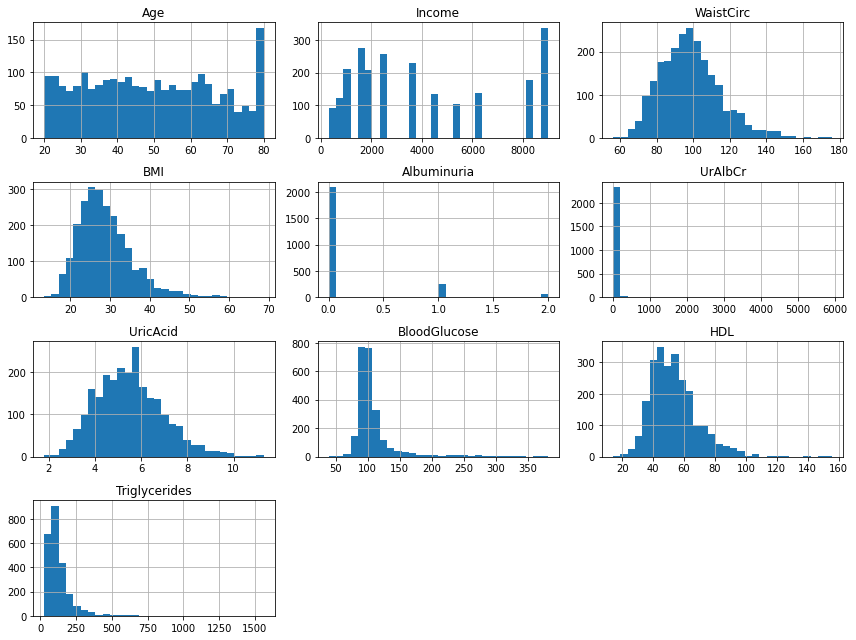

In [42]:
# Display histogram charts for the numeric columns in the dataframe.
df.hist(figsize=(12,9), bins=30)
plt.tight_layout()
plt.show;

#### **Age**

In [43]:
# Display column statistics.
df.Age.describe()

count    2401.000000
mean       48.691795
std        17.632852
min        20.000000
25%        34.000000
50%        48.000000
75%        63.000000
max        80.000000
Name: Age, dtype: float64

In [44]:
# Display column statistics.
column_statistics('Age')

Missing Values: 0 (0.0)%
Outliers: 0 (0.0)% low, 0 (0.0)% high
Unique values: 61


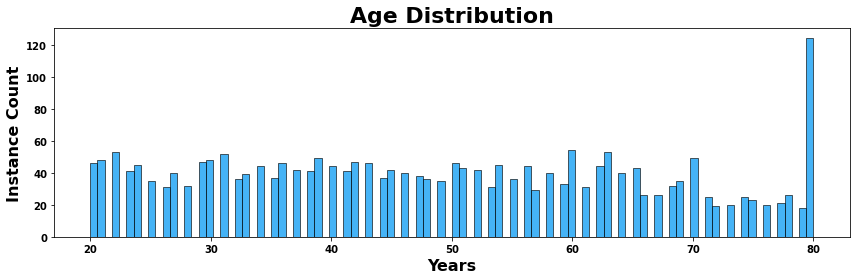

In [45]:
plt.figure(figsize = (12,4))
sns.histplot(data=df, x='Age', color='#069AF3', bins=100); 
plt.title('Age Distribution', fontsize = 22, weight='bold')
plt.xlabel('Years', fontsize = 16, weight='bold')
plt.ylabel('Instance Count', fontsize = 16, weight='bold');
plt.xticks(fontsize = 10, weight='bold', rotation=0)
plt.yticks(fontsize = 10, weight='bold');
plt.tight_layout()
plt.show;

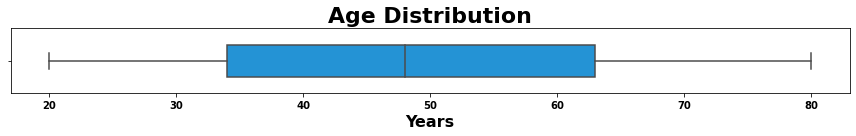

In [46]:
plt.figure(figsize = (12, 2))
sns.boxplot(data=df, x='Age', width=.5, color='#069AF3'); 
plt.title('Age Distribution', fontsize = 22, weight='bold')
plt.xlabel('Years', fontsize = 16, weight='bold')
plt.xticks(fontsize = 10, weight='bold', rotation=0)
plt.tight_layout()
plt.show;

- **Dispersion** - 'Age' is fairly evenly dispersed, with the excepton of the 79 year old value which is extremely high relative to other ages.
- **Skew** - 'Age' does not appear to be skewed.
- **Outliers** - 'Age' does not have any outliers.


#### **Income**

In [47]:
# Display column statistics.
df.Income.describe()

count    2284.000000
mean     4005.253940
std      2954.032186
min       300.000000
25%      1600.000000
50%      2500.000000
75%      6200.000000
max      9000.000000
Name: Income, dtype: float64

In [48]:
# Display column statistics.
column_statistics('Income')

Missing Values: 117 (4.9)%
Outliers: 0 (0.0)% low, 0 (0.0)% high
Unique values: 14
9000.0    337
2500.0    257
3500.0    228
1000.0    210
2000.0    207
1600.0    190
8200.0    178
6200.0    138
4500.0    136
800.0     123
NaN       117
5400.0    103
300.0      93
1700.0     54
1500.0     30
Name: Income, dtype: int64


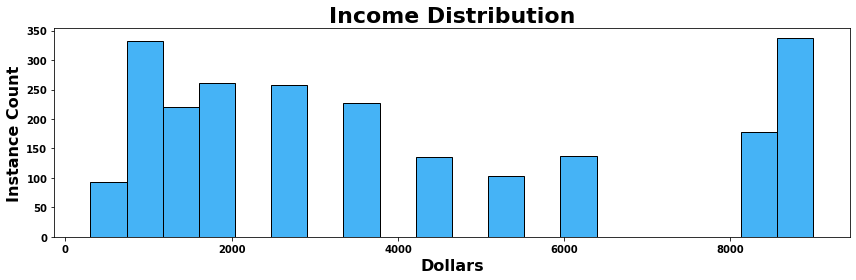

In [49]:
plt.figure(figsize = (12,4))
sns.histplot(data=df, x='Income', color='#069AF3', bins=20); 
plt.title('Income Distribution', fontsize = 22, weight='bold')
plt.xlabel('Dollars', fontsize = 16, weight='bold')
plt.ylabel('Instance Count', fontsize = 16, weight='bold');
plt.xticks(fontsize = 10, weight='bold', rotation=0)
plt.yticks(fontsize = 10, weight='bold');
plt.tight_layout()
plt.show;

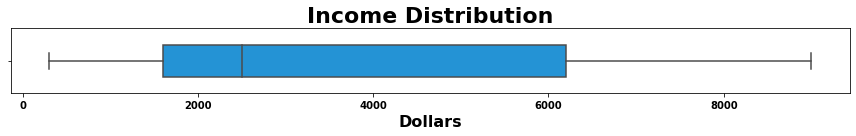

In [50]:
plt.figure(figsize = (12, 2))
sns.boxplot(data=df, x='Income', width=.5, color='#069AF3'); 
plt.title('Income Distribution', fontsize = 22, weight='bold')
plt.xlabel('Dollars', fontsize = 16, weight='bold')
plt.xticks(fontsize = 10, weight='bold', rotation=0)
plt.tight_layout()
plt.show;

- **Dispersion** - 'Income' only has 14 unique values, and is not evenly dispersed.
- **Skew** - 'Income' is postively skewed.
- **Outliers** - 'Income' does not have any outliers.

#### **WaistCirc**

In [51]:
# Display column statistics.
column_statistics('WaistCirc')

Missing Values: 85 (3.5)%
Outliers: 0 (0.0)% low, 44 (1.8)% high
Unique values: 635


In [52]:
column_statistics('WaistCirc')

Missing Values: 85 (3.5)%
Outliers: 0 (0.0)% low, 44 (1.8)% high
Unique values: 635


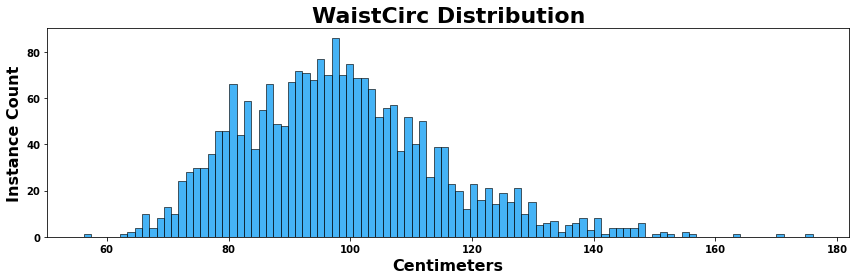

In [53]:
plt.figure(figsize = (12,4))
sns.histplot(data=df, x='WaistCirc', color='#069AF3', bins=100); 
plt.title('WaistCirc Distribution', fontsize = 22, weight='bold')
plt.xlabel('Centimeters', fontsize = 16, weight='bold')
plt.ylabel('Instance Count', fontsize = 16, weight='bold');
plt.xticks(fontsize = 10, weight='bold', rotation=0)
plt.yticks(fontsize = 10, weight='bold');
plt.tight_layout()
plt.show;

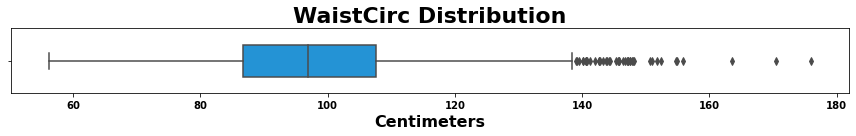

In [54]:
plt.figure(figsize = (12, 2))

sns.boxplot(data=df, x='WaistCirc', width=.5, color='#069AF3'); 

plt.title('WaistCirc Distribution', fontsize = 22, weight='bold')
plt.xlabel('Centimeters', fontsize = 16, weight='bold')
plt.xticks(fontsize = 10, weight='bold', rotation=0)

plt.tight_layout()
plt.show;

- **Dispersion** - 'WaistCirc' is not evenly dispersed.
- **Skew** - 'WaistCirc' does not appear to be skewed.
- **Outliers** - 'WaistCirc' has 44 (1.8%) outliers on the high side. 

#### **BMI**

In [55]:
# Display column statistics.
df.BMI.describe()

count    2375.000000
mean       28.702189
std         6.662242
min        13.400000
25%        24.000000
50%        27.700000
75%        32.100000
max        68.700000
Name: BMI, dtype: float64

In [56]:
# Display column statistics.
column_statistics('BMI')

Missing Values: 26 (1.1)%
Outliers: 0 (0.0)% low, 67 (2.8)% high
Unique values: 322


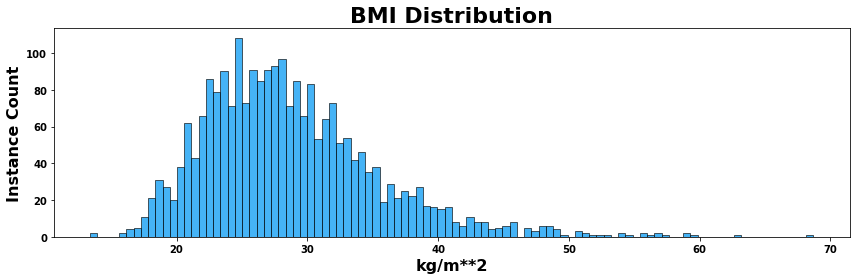

In [57]:
plt.figure(figsize = (12,4))
sns.histplot(data=df, x='BMI', color='#069AF3', bins=100); 
plt.title('BMI Distribution', fontsize = 22, weight='bold')
plt.xlabel('kg/m**2', fontsize = 16, weight='bold')
plt.ylabel('Instance Count', fontsize = 16, weight='bold');
plt.xticks(fontsize = 10, weight='bold', rotation=0)
plt.yticks(fontsize = 10, weight='bold');
plt.tight_layout()
plt.show;

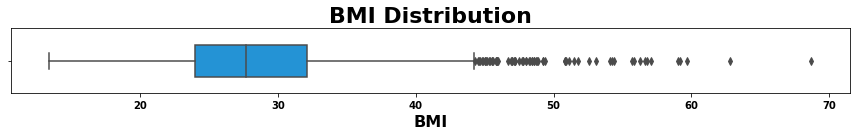

In [58]:
plt.figure(figsize = (12, 2))
sns.boxplot(data=df, x='BMI', width=.5, color='#069AF3'); 
plt.title('BMI Distribution', fontsize = 22, weight='bold')
plt.xlabel('BMI', fontsize = 16, weight='bold')
plt.xticks(fontsize = 10, weight='bold', rotation=0)
plt.tight_layout()
plt.show;

- **Dispersion** - 'WaistCirc' is not evenly dispersed.
- **Skew** - 'WaistCirc' does not appear to be skewed.
- **Outliers** - 'WaistCirc' has 67 (2.8%) outliers on the high side. 

#### **Albuminuria**

In [59]:
# Display column statistics.
df.Albuminuria.describe()

count    2401.000000
mean        0.154102
std         0.422780
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: Albuminuria, dtype: float64

In [60]:
# Display column statistics.
column_statistics('Albuminuria')

Missing Values: 0 (0.0)%
Outliers: 0 (0.0)% low, 312 (13.0)% high
Unique values: 3
0    2089
1     254
2      58
Name: Albuminuria, dtype: int64


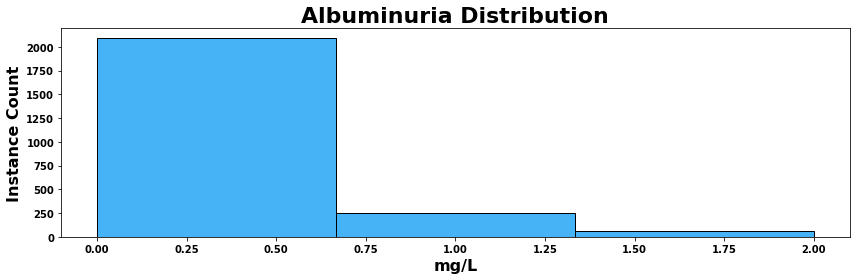

In [61]:
plt.figure(figsize = (12,4))
sns.histplot(data=df, x='Albuminuria', color='#069AF3', bins=3); 
plt.title('Albuminuria Distribution', fontsize = 22, weight='bold')
plt.xlabel('mg/L', fontsize = 16, weight='bold')
plt.ylabel('Instance Count', fontsize = 16, weight='bold');
plt.xticks(fontsize = 10, weight='bold', rotation=0)
plt.yticks(fontsize = 10, weight='bold');
plt.tight_layout()
plt.show;

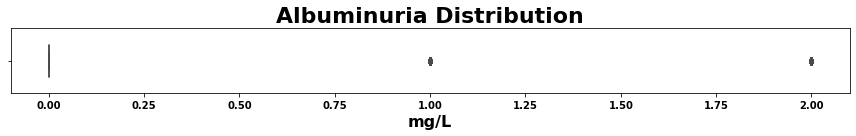

In [62]:
plt.figure(figsize = (12, 2))
sns.boxplot(data=df, x='Albuminuria', width=.5, color='#069AF3'); 
plt.title('Albuminuria Distribution', fontsize = 22, weight='bold')
plt.xlabel('mg/L', fontsize = 16, weight='bold')
plt.xticks(fontsize = 10, weight='bold', rotation=0)
plt.tight_layout()
plt.show;

- Albuminuria is an ordinal column with values of 0, 1, and 2.
- It has a significant count of '0' values relative to the '1' and '2' values.
- **Outliers** - 'WaistCirc' has 312 (13.0%) outliers on the high side, this includes all of the '1' and '2' values.

#### **UrAlbCr**

In [63]:
# Display column statistics.
df.UrAlbCr.describe()

count    2401.000000
mean       43.626131
std       258.272829
min         1.400000
25%         4.450000
50%         7.070000
75%        13.690000
max      5928.000000
Name: UrAlbCr, dtype: float64

In [64]:
# Display column statistics.
column_statistics('UrAlbCr')

Missing Values: 0 (0.0)%
Outliers: 0 (0.0)% low, 332 (13.8)% high
Unique values: 1383


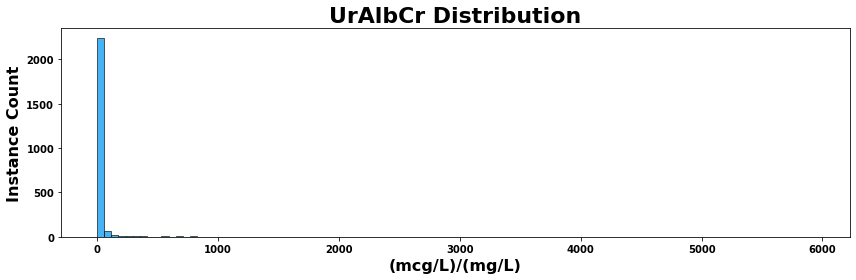

In [65]:
plt.figure(figsize = (12,4))
sns.histplot(data=df, x='UrAlbCr', color='#069AF3', bins=100); 
plt.title('UrAlbCr Distribution', fontsize = 22, weight='bold')
plt.xlabel('(mcg/L)/(mg/L)', fontsize = 16, weight='bold')
plt.ylabel('Instance Count', fontsize = 16, weight='bold');
plt.xticks(fontsize = 10, weight='bold', rotation=0)
plt.yticks(fontsize = 10, weight='bold');
plt.tight_layout()
plt.show;

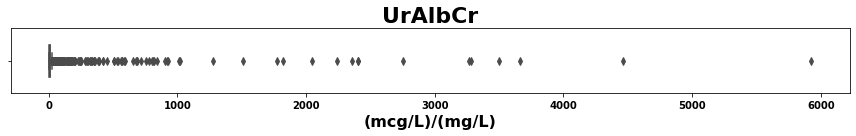

In [66]:
plt.figure(figsize = (12, 2))
sns.boxplot(data=df, x='UrAlbCr', width=.5, color='#069AF3'); 
plt.title('UrAlbCr', fontsize = 22, weight='bold')
plt.xlabel('(mcg/L)/(mg/L)', fontsize = 16, weight='bold')
plt.xticks(fontsize = 10, weight='bold', rotation=0)
plt.tight_layout()
plt.show;

- **Dispersion** - 'UrAlbCr' has the majority or its values between 0 and 100.
- **Outliers** - 'UrAlbCr' has 332 (13.8%) outliers on the high side. 

#### **UricAcid**

In [67]:
# Display column statistics.
df.UricAcid.describe()

count    2401.000000
mean        5.489046
std         1.439358
min         1.800000
25%         4.500000
50%         5.400000
75%         6.400000
max        11.300000
Name: UricAcid, dtype: float64

In [68]:
# Display column statistics.
column_statistics('UricAcid')

Missing Values: 0 (0.0)%
Outliers: 0 (0.0)% low, 30 (1.2)% high
Unique values: 88


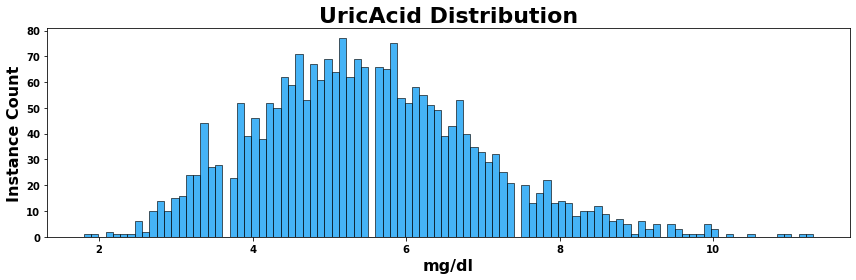

In [69]:
plt.figure(figsize = (12,4))
sns.histplot(data=df, x='UricAcid', color='#069AF3', bins=100); 
plt.title('UricAcid Distribution', fontsize = 22, weight='bold')
plt.xlabel('mg/dl', fontsize = 16, weight='bold')
plt.ylabel('Instance Count', fontsize = 16, weight='bold');
plt.xticks(fontsize = 10, weight='bold', rotation=00)
plt.yticks(fontsize = 10, weight='bold');
plt.tight_layout()
plt.show;

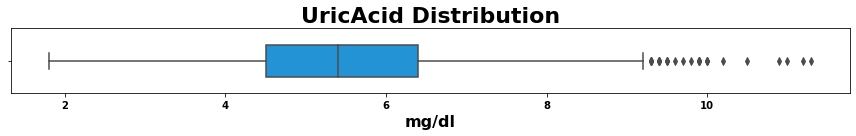

In [70]:
plt.figure(figsize = (12, 2))
sns.boxplot(data=df, x='UricAcid', width=.5, color='#069AF3'); 
plt.title('UricAcid Distribution', fontsize = 22, weight='bold')
plt.xlabel('mg/dl', fontsize = 16, weight='bold')
plt.xticks(fontsize = 10, weight='bold', rotation=0)
plt.tight_layout()
plt.show;

- **Dispersion** - 'UricAcid' is not evenly dispersed.
- **Skew** - 'UricAcid' is not skewed.
- **Outliers** - 'UricAcid' has 30 (1.2%) outliers in the high side.

#### **BloodGlucose**

In [71]:
# Display column statistics.
df.BloodGlucose.describe()

count    2401.000000
mean      108.247813
std        34.820657
min        39.000000
25%        92.000000
50%        99.000000
75%       110.000000
max       382.000000
Name: BloodGlucose, dtype: float64

In [72]:
# Display column statistics.
column_statistics('BloodGlucose')

Missing Values: 0 (0.0)%
Outliers: 6 (0.2)% low, 214 (8.9)% high
Unique values: 187


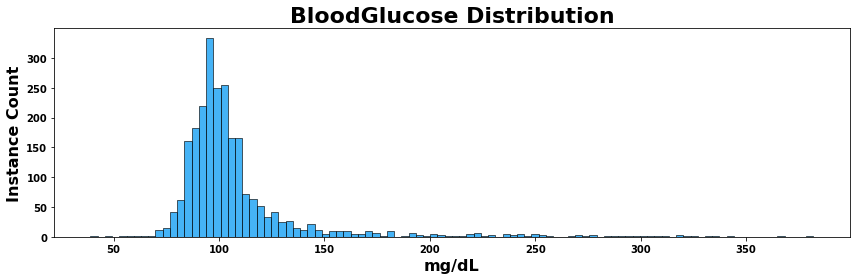

In [73]:
plt.figure(figsize = (12,4))
sns.histplot(data=df, x='BloodGlucose', color='#069AF3', bins=100); 
plt.title('BloodGlucose Distribution', fontsize = 22, weight='bold')
plt.xlabel('mg/dL', fontsize = 16, weight='bold')
plt.ylabel('Instance Count', fontsize = 16, weight='bold');
plt.xticks(fontsize = 10, weight='bold', rotation=0)
plt.yticks(fontsize = 10, weight='bold');
plt.tight_layout()
plt.show;

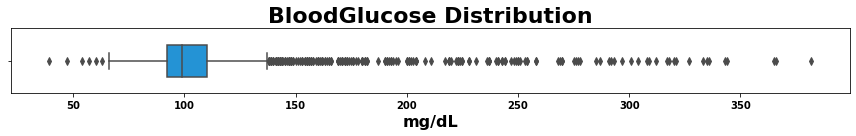

In [74]:
plt.figure(figsize = (12, 2))
sns.boxplot(data=df, x='BloodGlucose', width=.5, color='#069AF3'); 
plt.title('BloodGlucose Distribution', fontsize = 22, weight='bold')
plt.xlabel('mg/dL', fontsize = 16, weight='bold')
plt.xticks(fontsize = 10, weight='bold', rotation=0)
plt.tight_layout()
plt.show;

- **Dispersion** - 'BloodGlucose' is not evenly dispersed.
- **Skew** - 'BloodGlucose' is slightly positively skewed.
- **Outliers** - 'BloodGlucose' has 6 (0.2%) outliers on the low side, and 214 (8.9)% outliers on the high side.

#### **HDL**

In [75]:
# Display column statistics.
df.HDL.describe()

count    2401.000000
mean       53.369429
std        15.185537
min        14.000000
25%        43.000000
50%        51.000000
75%        62.000000
max       156.000000
Name: HDL, dtype: float64

In [76]:
# Display column statistics.
column_statistics('HDL')

Missing Values: 0 (0.0)%
Outliers: 1 (0.0)% low, 53 (2.2)% high
Unique values: 93


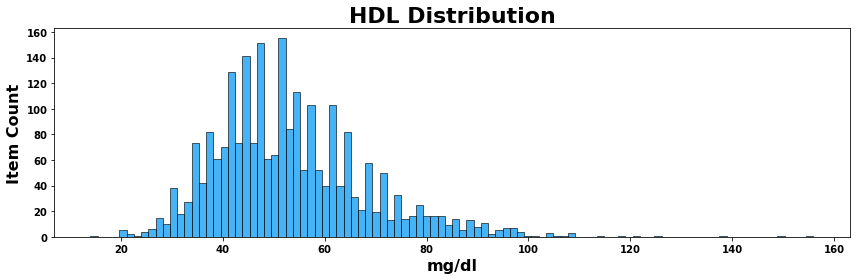

In [77]:
plt.figure(figsize = (12,4))
sns.histplot(data=df, x='HDL', color='#069AF3', bins=100); 
plt.title('HDL Distribution', fontsize = 22, weight='bold')
plt.xlabel('mg/dl', fontsize = 16, weight='bold')
plt.ylabel('Item Count', fontsize = 16, weight='bold');
plt.xticks(fontsize = 10, weight='bold', rotation=0)
plt.yticks(fontsize = 10, weight='bold');
plt.tight_layout()
plt.show;

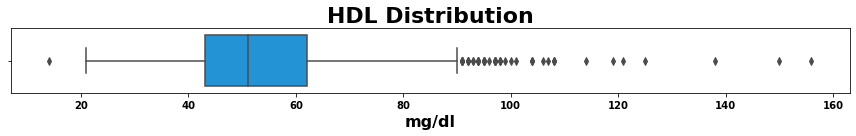

In [78]:
plt.figure(figsize = (12, 2))
sns.boxplot(data=df, x='HDL', color='#069AF3'); 
plt.title('HDL Distribution', fontsize = 22, weight='bold')
plt.xlabel('mg/dl', fontsize = 16, weight='bold')
plt.xticks(fontsize = 10, weight='bold', rotation=0)
plt.tight_layout()
plt.show;

- **Dispersion** - 'HDL' is not evenly dispersed.
- **Skew** - 'HDL' is slightly positively skewed.
- **Outliers** - 'HDL' has only 1 (0.0%) outlier on the low side, 53 (2.2%) outliers on the high side.

#### **Triglycerides**

In [79]:
# Display column statistics.
df.Triglycerides.describe()

count    2401.000000
mean      128.125364
std        95.322477
min        26.000000
25%        75.000000
50%       103.000000
75%       150.000000
max      1562.000000
Name: Triglycerides, dtype: float64

In [80]:
# Display column statistics.
column_statistics('Triglycerides')

Missing Values: 0 (0.0)%
Outliers: 0 (0.0)% low, 161 (6.7)% high
Unique values: 345


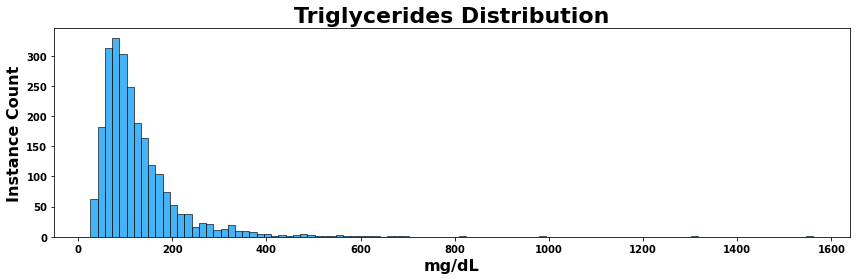

In [81]:
plt.figure(figsize = (12,4))
sns.histplot(data=df, x='Triglycerides', color='#069AF3', bins=100); 
plt.title('Triglycerides Distribution', fontsize = 22, weight='bold')
plt.xlabel('mg/dL', fontsize = 16, weight='bold')
plt.ylabel('Instance Count', fontsize = 16, weight='bold');
plt.xticks(fontsize = 10, weight='bold', rotation=0)
plt.yticks(fontsize = 10, weight='bold');
plt.tight_layout()
plt.show;

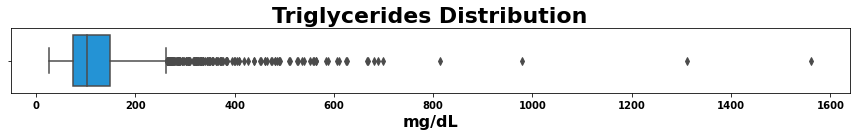

In [82]:
plt.figure(figsize = (12, 2))
sns.boxplot(data=df, x='Triglycerides', color='#069AF3'); 
plt.title('Triglycerides Distribution', fontsize = 22, weight='bold')
plt.xlabel('mg/dL', fontsize = 16, weight='bold')
plt.xticks(fontsize = 10, weight='bold', rotation=0)
plt.tight_layout()
plt.show;

- **Dispersion** - 'Triglycerides' is not evenly dispersed.
- **Skew** - 'Triglycerides' is slightly positively skewed.
- **Outliers** - 'Triglycerides' has 161 (6.7%) outliers on the high side.

### **Categorical Columns**

#### **Summary Statistics**

In [83]:
# Display the descriptive statistics for the non-numeric columns.
df.describe(exclude=('number'))

,Sex,Marital,Race,MetabolicSyndrome
count,2401,2401,2401,2401
unique,2,6,6,2
top,Female,Married,White,No MetSyn
freq,1211,1192,933,1579


- No issues noted.

#### **Sex**

In [84]:
# Display column statistics.
df.Sex.describe()

count       2401
unique         2
top       Female
freq        1211
Name: Sex, dtype: object

In [85]:
# Display column statistics.
column_statistics('Sex')

Missing Values: 0 (0.0)%
Unique values: 2
Female    1211
Male      1190
Name: Sex, dtype: int64


In [86]:
# Display column statistics.
df['Sex'].value_counts(normalize=True)

Female    0.504373
Male      0.495627
Name: Sex, dtype: float64

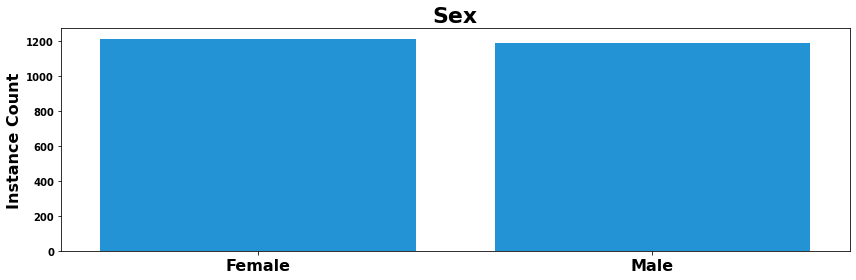

In [87]:
plt.figure(figsize = (12,4))
sns.countplot(data=df, x=df.Sex, color='#069AF3', order=['Female', 'Male'])
plt.title('Sex', fontsize = 22, weight='bold');
plt.xlabel('', fontsize = 16, weight='bold');
plt.ylabel('Instance Count', fontsize = 16, weight='bold');
plt.xticks(fontsize = 16, weight='bold', rotation=0);
plt.yticks(fontsize = 10, weight='bold');
plt.tight_layout()
plt.show;

- Sex appears to be fairly evenly balanced between the two values.

#### **Marital**

In [88]:
# Display column statistics.
df.Marital.describe()

count        2401
unique          6
top       Married
freq         1192
Name: Marital, dtype: object

In [89]:
# Display column statistics.
column_statistics('Marital')

Missing Values: 0 (0.0)%
Unique values: 6
Married      1192
Single        498
Divorced      242
Unknown       208
Widowed       166
Separated      95
Name: Marital, dtype: int64


In [90]:
df['Marital'].value_counts(normalize=True)

Married      0.496460
Single       0.207414
Divorced     0.100791
Unknown      0.086631
Widowed      0.069138
Separated    0.039567
Name: Marital, dtype: float64

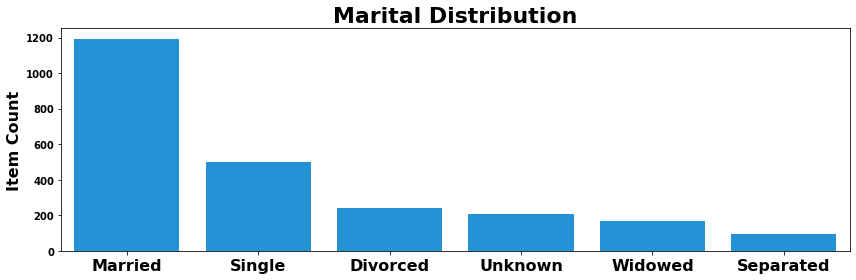

In [91]:
plt.figure(figsize = (12,4))
sns.countplot(data=df, x=df.Marital, color='#069AF3', order=['Married',
              'Single', 'Divorced', 'Unknown', 'Widowed', 'Separated'])
plt.title('Marital Distribution', fontsize = 22, weight='bold');
plt.xlabel('', fontsize = 16, weight='bold');
plt.ylabel('Item Count', fontsize = 16, weight='bold');
plt.xticks(fontsize = 16, weight='bold', rotation=0);
plt.yticks(fontsize = 10, weight='bold');
plt.tight_layout()
plt.show;

- 'Married' has significantly more values, followed by 'Single'.

#### **MetabolicSyndrome**

In [92]:
# Display column statistics.
df.MetabolicSyndrome.describe()

count          2401
unique            2
top       No MetSyn
freq           1579
Name: MetabolicSyndrome, dtype: object

In [93]:
# Display column statistics.
column_statistics('MetabolicSyndrome')

Missing Values: 0 (0.0)%
Unique values: 2
No MetSyn    1579
MetSyn        822
Name: MetabolicSyndrome, dtype: int64


In [94]:
df['MetabolicSyndrome'].value_counts(normalize=True)

No MetSyn    0.657643
MetSyn       0.342357
Name: MetabolicSyndrome, dtype: float64

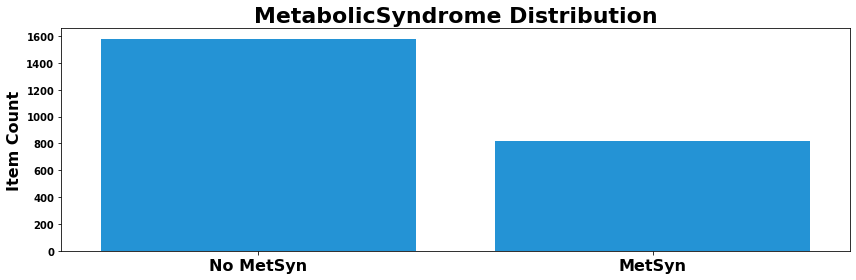

In [95]:
plt.figure(figsize = (12,4))
sns.countplot(data=df, x=df.MetabolicSyndrome, color='#069AF3', order=['No MetSyn', 'MetSyn'])
plt.title('MetabolicSyndrome Distribution', fontsize = 22, weight='bold');
plt.xlabel('', fontsize = 16, weight='bold');
plt.ylabel('Item Count', fontsize = 16, weight='bold');
plt.xticks(fontsize = 16, weight='bold', rotation=0);
plt.yticks(fontsize = 10, weight='bold');
plt.tight_layout()
plt.show;

- There are significantly more 'No MetSyn' (negative) values than 'MetSyn' (positive) values.
- This is our target value to predict and it is unbalanced.

### **Correlation Heatmap**

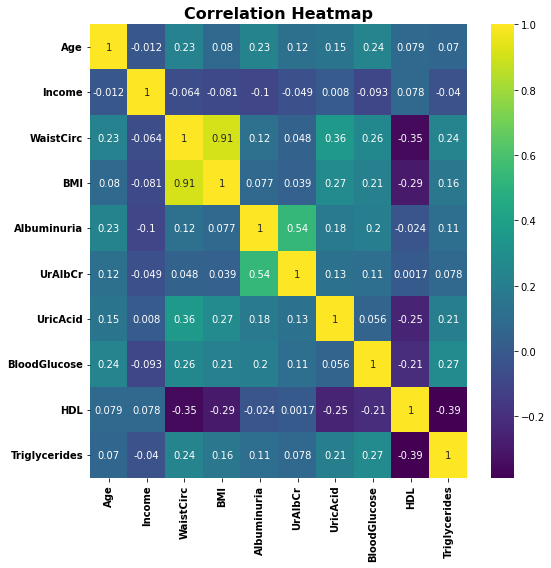

In [96]:
plt.figure(figsize = (8, 8))
corr = df.corr()
sns.heatmap(corr, cmap='viridis', annot=True);
plt.title('Correlation Heatmap', fontsize = 16, weight='bold')
plt.xticks(fontsize = 10, weight='bold', rotation=90)
plt.yticks(fontsize = 10, weight='bold');
plt.tight_layout()
plt.show;

- BMI and WaistCirc have high positive correlation of 0.91. Body mass index (BMI) is a measure of body fat percentage based on height and weight that applies to adult men and women. BMI and WaistCirc are both dependent variables of height and weight.

## **Preprocessing/Processing for Machine Learning**

### **Identify each feature as ordinal, numerical, nominal, or pass through**

- ordinal features = none
- numeric features = []
- nominal features = []
- date/time features = none
- pass through = none

- There are no features to impute, and all features to be included in X_Train and X_Test are numercal, so we will not need to create or use column transformers. We can include Standard Scalar with our KNN Model Processor in a single pipeline.

### **Evaluate if Target is Balanced**

In [97]:
df['MetabolicSyndrome'].value_counts(normalize=True)

No MetSyn    0.657643
MetSyn       0.342357
Name: MetabolicSyndrome, dtype: float64

- The target, MetabolicSyndrome, is not balanced.

### **Validation Split**

In [98]:
# Define features (X) and target (y)
X = df.drop(columns = ['MetabolicSyndrome'])
y = df['MetabolicSyndrome']

In [102]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### **Instantiate Column Selectors**

In [112]:
# Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [ ]:
cat_selector(X_train)

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [113]:
num_selector(X_train)

['Age',
 'Income',
 'WaistCirc',
 'BMI',
 'Albuminuria',
 'UrAlbCr',
 'UricAcid',
 'BloodGlucose',
 'HDL',
 'Triglycerides']

### **Instantiate Transformers**

In [114]:
# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
median_imputer = SimpleImputer(strategy='median')
# Scaler
scaler = StandardScaler()
# One Hot Encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

### **Instantiate Pipelines**

In [115]:
# Numeric pipeline
numeric_pipe = make_pipeline(median_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [116]:
# Categorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

### **Instantiate ColumnTransformer**

In [117]:
# Tuples for Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)

# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple, remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fde2e866d50>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._colum

### **Fit and Transform Data**

In [120]:
# Fit on Train
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fde2e866d50>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._colum

In [121]:
# Transform Train and Test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

### **Inspect the Result**

In [122]:
# Check for missing values and that data is scaled and one-hot encoded
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (1800, 24)




array([[-0.17687515,  1.44357931,  1.59131287, ...,  0.        ,
         0.        ,  1.        ],
       [-0.85740654, -0.16517283, -0.76716338, ...,  1.        ,
         0.        ,  0.        ],
       [-0.91411749, -0.16517283, -1.46597116, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.75129713, -0.16517283, -0.53006788, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.67378909, -0.67860436,  0.76771799, ...,  0.        ,
         0.        ,  0.        ],
       [-1.14096129, -0.67860436,  0.49318636, ...,  0.        ,
         0.        ,  1.        ]])

In [123]:
X_test_df = pd.DataFrame(X_test_processed)
X_train_df = pd.DataFrame(X_train_processed)

In [124]:
X_train_df.describe().round(2)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,1800.00,1800.00,1800.00,1800.00,1800.00,1800.00,1800.00,1800.00,1800.00,1800.00,...,1800.00,1800.00,1800.00,1800.00,1800.00,1800.00,1800.00,1800.00,1800.00,1800.00
mean,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,...,0.04,0.21,0.09,0.07,0.15,0.23,0.11,0.10,0.03,0.39
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,0.20,0.41,0.28,0.25,0.36,0.42,0.31,0.31,0.16,0.49
min,-1.65,-1.26,-2.21,-2.28,-0.37,-0.16,-2.53,-2.06,-2.15,-1.06,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,-0.86,-0.82,-0.70,-0.70,-0.37,-0.15,-0.69,-0.47,-0.70,-0.56,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,-0.01,-0.51,-0.09,-0.16,-0.37,-0.14,-0.07,-0.23,-0.14,-0.26,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.79,0.76,0.56,0.51,-0.37,-0.12,0.61,0.07,0.55,0.22,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
max,1.75,1.72,4.84,6.01,4.34,20.81,3.95,8.20,6.73,14.89,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [126]:
X_test_df.describe().round(2)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,601.00,601.00,601.00,601.00,601.00,601.00,601.00,601.00,601.00,601.00,...,601.00,601.00,601.00,601.00,601.00,601.00,601.0,601.00,601.00,601.00
mean,-0.10,-0.07,-0.06,-0.03,-0.01,-0.05,-0.04,0.05,-0.08,0.01,...,0.03,0.21,0.09,0.07,0.14,0.24,0.1,0.11,0.02,0.39
std,1.00,0.97,0.98,0.99,0.98,0.58,0.92,1.15,0.99,0.96,...,0.17,0.41,0.28,0.25,0.34,0.43,0.3,0.31,0.16,0.49
min,-1.65,-1.26,-2.64,-2.31,-0.37,-0.16,-2.05,-1.61,-2.61,-1.06,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
25%,-0.97,-0.82,-0.75,-0.73,-0.37,-0.15,-0.69,-0.47,-0.83,-0.54,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
50%,-0.18,-0.51,-0.09,-0.16,-0.37,-0.14,-0.07,-0.26,-0.24,-0.26,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
75%,0.73,0.49,0.51,0.46,-0.37,-0.12,0.54,0.04,0.55,0.24,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1.00
max,1.75,1.72,3.51,4.55,4.34,8.34,3.00,7.72,6.34,8.84,...,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00


## **Baseline Model**

### **Instantiate the Baseline Model**

In [128]:
# Instantiate the Model
dummy = DummyClassifier(strategy='most_frequent')
dummy_model_processor = make_pipeline(scaler, dummy)
# Fit the Model
dummy_model_processor.fit(X_train_processed, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('dummyclassifier', DummyClassifier(strategy='most_frequent'))])

### **Baseline Metrics**

#### **Predictions**

In [131]:
# Predictions From Dummy Model
dummy_train_preds = dummy_model_processor.predict(X_train_df)
dummy_test_preds = dummy_model_processor.predict(X_test_df)

#### **Accuracy Scores**

In [134]:
# Calculate classification accuracy
dummy_model_accuracy = accuracy_score(y_test, dummy_test_preds)
# Print Accuracy Score
print(f'Dummy Model Accuracy Score = {dummy_model_accuracy}')

Dummy Model Accuracy Score = 0.6605657237936772


In [136]:
# Calculate classification accuracy
dummy_train_score = dummy_model_processor.score(X_train_processed, y_train)
dummy_test_score = dummy_model_processor.score(X_test_processed, y_test)
# Print Accuracy Scores
print(f'Dummy Model Train Accuracy Score: {dummy_train_score}')
print(f'Dummy Model Test Accuracy Score: {dummy_test_score}')

Dummy Model Train Accuracy Score: 0.6566666666666666
Dummy Model Test Accuracy Score: 0.6605657237936772


## **Logistic Regression Model**

### **Instantiate the Linear Regression Model**

In [137]:
# Make an instance of the Model
logreg = LogisticRegression(C = 1000)

### **Create the Pipeline**

In [138]:
# Create pipeline
logreg_pipe = make_pipeline(scaler, logreg)

### **Fit and Train the Model on the Data**

In [139]:
# Fit the model
logreg_pipe.fit(X_train_processed,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=1000))])

### **Print Training Scores**

In [141]:
# Print Scores
print(logreg_pipe.score(X_train_processed, y_train))
print(logreg_pipe.score(X_test_processed, y_test))

0.8555555555555555
0.831946755407654


### **Hyperparameter Tuning**

#### **L1 Tuning**

##### **Wideband Tuning**

{0.0001: 0.33943427620632277,
 0.001: 0.33943427620632277,
 0.01: 0.8069883527454242,
 0.1: 0.8302828618968386,
 1: 0.8286189683860233,
 10: 0.831946755407654,
 100: 0.831946755407654,
 1000: 0.831946755407654}

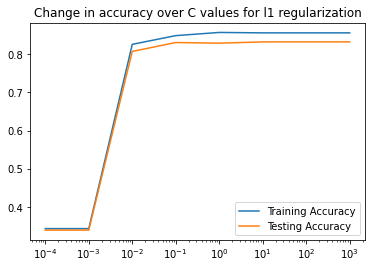

In [143]:
# Create a List of C Values and Empty Lists for Scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
 
# Create a loop to iterative over the C values
for c in c_values:
 
  # Instantiate and Fit the Model on the data
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1')
  log_reg_pipe = make_pipeline(scaler, log_reg)
  log_reg_pipe.fit(X_train_processed, y_train)
 
  # Add the Train and Test Scores to our Scores Lists
  train_scores.append(log_reg_pipe.score(X_train_processed, y_train))
  test_scores.append(log_reg_pipe.score(X_test_processed, y_test))
 
# Plot the Accuracy Scores for the C Values
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend()
 
# Set the X Axis to a logarithmic Scale
ax.set_xscale('log')

# Print a Dictionary for C Values and Accuracy Scores
{c:score for c, score in zip(c_values, test_scores)}

##### **Fine Tuning**

{5.05: 0.831946755407654,
 5.06: 0.8302828618968386,
 5.07: 0.8302828618968386,
 5.08: 0.8302828618968386,
 5.09: 0.8302828618968386,
 5.1: 0.8302828618968386,
 5.11: 0.8302828618968386,
 5.12: 0.8302828618968386,
 5.13: 0.8302828618968386,
 5.14: 0.8302828618968386,
 5.15: 0.8302828618968386,
 5.16: 0.8302828618968386,
 5.17: 0.8302828618968386,
 5.18: 0.831946755407654,
 5.19: 0.831946755407654,
 5.2: 0.831946755407654,
 5.21: 0.831946755407654,
 5.22: 0.831946755407654,
 5.23: 0.831946755407654,
 5.24: 0.8302828618968386,
 5.25: 0.831946755407654}

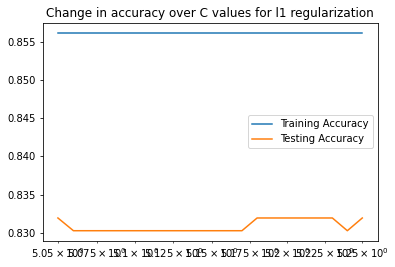

In [155]:
# Create a List of C Values and Empty Lists for Scores
c_values = [5.05, 5.06, 5.07, 5.08, 5.09, 5.10, 5.11, 5.12, 5.13, 5.14, 5.15, 5.16, 5.17, 5.18, 5.19, 5.20, 5.21, 5.22, 5.23, 5.24, 5.25]
train_scores = []
test_scores = []
 
# Create a loop to iterative over the C values
for c in c_values:
 
  # Instantiate and Fit the Model on the data
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1')
  log_reg_pipe = make_pipeline(scaler, log_reg)
  log_reg_pipe.fit(X_train_processed, y_train)
 
  # Add the Train and Test Scores to our Scores Lists
  train_scores.append(log_reg_pipe.score(X_train_processed, y_train))
  test_scores.append(log_reg_pipe.score(X_test_processed, y_test))
 
# Plot the Accuracy Scores for the C Values
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend()
 
# Set the X Axis to a logarithmic Scale
ax.set_xscale('log')

# Print a Dictionary for C Values and Accuracy Scores
{c:score for c, score in zip(c_values, test_scores)}

##### **Best L1 Tuned Logistics Regression Model**

In [158]:
best_l1_log_reg = LogisticRegression(C=5.2, max_iter=1000, solver='liblinear', penalty='l1')
best_l1_log_reg_pipe = make_pipeline(scaler, best_l1_log_reg)
best_l1_log_reg_pipe.fit(X_train_processed, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=5.2, max_iter=1000, penalty='l1',
                                    solver='liblinear'))])

##### **Predictions**

In [160]:
# Predictions from Best L1 Tuned Logistics Regression Model
best_l1_log_reg_train_preds = best_l1_log_reg_pipe.predict(X_train_processed)
best_l1_log_reg_test_preds = best_l1_log_reg_pipe.predict(X_test_processed)

##### **Accuracy Scores**

In [161]:
# Calculate classification accuracy
best_l1_log_reg_model_accuracy = accuracy_score(y_test, best_l1_log_reg_test_preds)
# Print Accuracy Score
print(f'Best L1 Tuned Logistics Regression Model Accuracy Score = {best_l1_log_reg_model_accuracy}')

Best L1 Tuned Logistics Regression Model Accuracy Score = 0.831946755407654


In [163]:
# Calculate classification accuracy
best_l1_log_reg_train_score = best_l1_log_reg_pipe.score(X_train_processed, y_train)
best_l1_log_reg_test_score = best_l1_log_reg_pipe.score(X_test_processed, y_test)
# Print Accuracy Scores
print(f'Best L1 Tuned Logistics Regression Train Accuracy Score: {best_l1_log_reg_train_score}')
print(f'Best L1 Tuned Logistics Regression Test Accuracy Score: {best_l1_log_reg_test_score}')

Best L1 Tuned Logistics Regression Train Accuracy Score: 0.8561111111111112
Best L1 Tuned Logistics Regression Test Accuracy Score: 0.831946755407654


#### **L2 Tuning**

##### **Wideband Tuning**

{0.0001: 0.7886855241264559,
 0.001: 0.7986688851913477,
 0.01: 0.8286189683860233,
 0.1: 0.826955074875208,
 1: 0.8302828618968386,
 10: 0.831946755407654,
 100: 0.831946755407654,
 1000: 0.831946755407654}

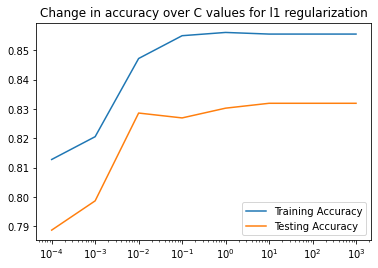

In [166]:
# Create a List of C Values and Empty Lists for Scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
 
# Create a loop to iterative over the C values
for c in c_values:
 
  # Instantiate and Fit the Model on the data
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l2')
  log_reg_pipe = make_pipeline(scaler, log_reg)
  log_reg_pipe.fit(X_train_processed, y_train)
 
  # Add the Train and Test Scores to our Scores Lists
  train_scores.append(log_reg_pipe.score(X_train_processed, y_train))
  test_scores.append(log_reg_pipe.score(X_test_processed, y_test))
 
# Plot the Accuracy Scores for the C Values
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend()
 
# Set the X Axis to a logarithmic Scale
ax.set_xscale('log')

# Print a Dictionary for C Values and Accuracy Scores
{c:score for c, score in zip(c_values, test_scores)}

##### **Fine Tuning**

{0.95: 0.8302828618968386,
 0.96: 0.8302828618968386,
 0.97: 0.8302828618968386,
 0.98: 0.8302828618968386,
 0.99: 0.8302828618968386,
 1.0: 0.8302828618968386,
 1.01: 0.8302828618968386,
 1.02: 0.831946755407654,
 1.03: 0.831946755407654,
 1.04: 0.831946755407654,
 1.05: 0.831946755407654}

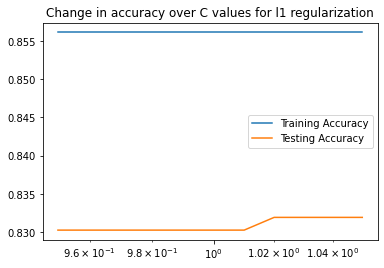

In [175]:
# Create a List of C Values and Empty Lists for Scores
c_values =  [0.95, 0.96, 0.97, 0.98, 0.99, 1.00, 1.01, 1.02, 1.03, 1.04, 1.05]
train_scores = []
test_scores = []
 
# Create a loop to iterative over the C values
for c in c_values:
 
  # Instantiate and Fit the Model on the data
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l2')
  log_reg_pipe = make_pipeline(scaler, log_reg)
  log_reg_pipe.fit(X_train_processed, y_train)
 
  # Add the Train and Test Scores to our Scores Lists
  train_scores.append(log_reg_pipe.score(X_train_processed, y_train))
  test_scores.append(log_reg_pipe.score(X_test_processed, y_test))
 
# Plot the Accuracy Scores for the C Values
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend()
 
# Set the X Axis to a logarithmic Scale
ax.set_xscale('log')

# Print a Dictionary for C Values and Accuracy Scores
{c:score for c, score in zip(c_values, test_scores)}

##### **Best L2 Tuned Logistics Regression Model**

In [177]:
best_l2_log_reg = LogisticRegression(C=1.02, max_iter=1000, solver='liblinear', penalty='l2')
best_l2_log_reg_pipe = make_pipeline(scaler, best_l2_log_reg)
best_l2_log_reg_pipe.fit(X_train_processed, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=1.02, max_iter=1000,
                                    solver='liblinear'))])

##### **Predictions**

In [179]:
# Predictions from Best L2 Tuned Logistics Regression Model
best_l2_log_reg_train_preds = best_l2_log_reg_pipe.predict(X_train_processed)
best_l2_log_reg_test_preds = best_l2_log_reg_pipe.predict(X_test_processed)

##### **Accuracy Scores**

In [180]:
# Calculate classification accuracy
best_l2_log_reg_model_accuracy = accuracy_score(y_test, best_l2_log_reg_test_preds)
# Print Accuracy Score
print(f'Best L2 Tuned Logistics Regression Model Accuracy Score = {best_l2_log_reg_model_accuracy}')

Best L2 Tuned Logistics Regression Model Accuracy Score = 0.831946755407654


In [182]:
# Calculate classification accuracy
best_l2_log_reg_train_score = best_l2_log_reg_pipe.score(X_train_processed, y_train)
best_l2_log_reg_test_score = best_l2_log_reg_pipe.score(X_test_processed, y_test)
# Print Accuracy Scores
print(f'Best L2 Tuned Logistics Regression Train Accuracy Score: {best_l2_log_reg_train_score}')
print(f'Best L2 Tuned Logistics Regression Test Accuracy Score: {best_l2_log_reg_test_score}')

Best L2 Tuned Logistics Regression Train Accuracy Score: 0.8561111111111112
Best L2 Tuned Logistics Regression Test Accuracy Score: 0.831946755407654




---



## **Random Forest Model**

### **Instantiate the Random Forest Model**

In [184]:
# Make an instance of the Model
ran_for = RandomForestClassifier(random_state = 42)

### **Fit and Train the Model on the Data**

In [185]:
# Fit the model
ran_for.fit(X_train_processed, y_train)

RandomForestClassifier(random_state=42)

### **Predictions**

In [186]:
# Predictions from KNN Model with the best hyperparameters
ran_for_train_preds = ran_for.predict(X_train_processed)
ran_for_test_preds = ran_for.predict(X_test_processed)

### **Accuracy Scores**

In [187]:
# Calculate classification accuracy
ran_for_model_accuracy = accuracy_score(y_test, ran_for_test_preds)
# Print Accuracy Score
print(f'Random Forest Model Accuracy Score = {ran_for_model_accuracy}')

Random Forest Model Accuracy Score = 0.8752079866888519


In [188]:
# Calculate classification accuracy
ran_for_train_score = ran_for.score(X_train_processed, y_train)
ran_for_test_score = ran_for.score(X_test_processed, y_test)
print(f'Random Forest Train Accuracy Score: {ran_for_train_score}')
print(f'Random Forest Test Accuracy Score: {ran_for_test_score}')

Random Forest Train Accuracy Score: 1.0
Random Forest Test Accuracy Score: 0.8752079866888519




---



## **KNN Model**

#### **KNN Model Processor**

In [189]:
# Make an instance of the Model
knn = KNeighborsClassifier()

#### **Create Pipelines**

In [190]:
# Create Pipeline
knn_model_processor = make_pipeline(scaler, knn)

#### **Fit and Transform Data**

In [194]:
# Fit on Train
knn_model_processor.fit(X_train_processed, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

#### **Accuracy Score**

In [196]:
# Print Model Accuracy
knn_model_accuracy = accuracy_score(y_test, knn_model_processor.predict(X_test_processed))

print(f'KNN Model Accuracy = {knn_model_accuracy}')

KNN Model Accuracy = 0.7653910149750416


#### **Hypertuning Parameters**

#### **Get KNN Model Parameters**

In [197]:
knn_model_processor.get_params()

{'kneighborsclassifier': KNeighborsClassifier(),
 'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': None,
 'kneighborsclassifier__n_neighbors': 5,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform',
 'memory': None,
 'standardscaler': StandardScaler(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'steps': [('standardscaler', StandardScaler()),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False}

#### **Hypertune Using Loop**

In [200]:
krange = range(1, 50)
k_list = []
for k in krange: 
  knn_model_processor = make_pipeline(scaler, KNeighborsClassifier(n_neighbors=k))
  knn_model_processor.fit(X_train_processed, y_train)
  score = accuracy_score(y_test, knn_model_processor.predict(X_test_processed))
  k_list.append(score)

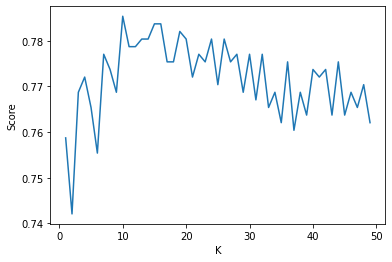

In [201]:
# Visualize Score
plt.plot(krange, k_list)
plt.xlabel('K')
plt.ylabel('Score');

In [204]:
knn_model_processor = make_pipeline(scaler, KNeighborsClassifier(n_neighbors=10))
knn_model_processor.fit(X_train_processed, y_train)
score = accuracy_score(y_test, knn_model_processor.predict(X_test_processed))

In [205]:
# Print Model Accuracy Score
knn_model_accuracy = accuracy_score(y_test, knn_model_processor.predict(X_test_processed))
print(f'KNN Model Accuracy Score = {knn_model_accuracy}')

KNN Model Accuracy Score = 0.7853577371048253


#### **Hypertune using GridSearch**

##### **Select KNN Model Parameters for GridSearch**

In [209]:
# Select Hyperparameters
knn_parameters = { 'kneighborsclassifier__n_neighbors': [9,10,11], # Default is 5
                  'kneighborsclassifier__leaf_size': [2,3,4,5,6,7,8,9,10]} # Default is 30

##### **Instantiate Grid Search**

In [210]:
# Instantiate Gridsearch
knn_grid = GridSearchCV(knn_model_processor, knn_parameters)
# Fit GridSearch
knn_grid.fit(X_train_processed, y_train)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier(n_neighbors=10))]),
             param_grid={'kneighborsclassifier__leaf_size': [2, 3, 4, 5, 6, 7,
                                                             8, 9, 10],
                         'kneighborsclassifier__n_neighbors': [9, 10, 11]})

In [208]:
# Display the best hyperparameters From GridSearchCV
knn_grid.best_params_

{'kneighborsclassifier__leaf_size': 5, 'kneighborsclassifier__n_neighbors': 10}

In [211]:
# Extract KNN Model with best hyperparameters
best_knn = knn_grid.best_estimator_

### **Predictions**

In [212]:
# Predictions from KNN Model with the best hyperparameters
knn_train_preds = best_knn.predict(X_train_processed)
knn_test_preds = best_knn.predict(X_test_processed)

### **Accuracy Scores**

In [213]:
# Print Model Accuracy Score
knn_model_accuracy = accuracy_score(y_test, knn_test_preds)
print(f'KNN Model Accuracy Score = {knn_model_accuracy}')

KNN Model Accuracy Score = 0.7853577371048253


In [214]:
# calculate classification accuracy
knn_train_score = best_knn.score(X_train_processed, y_train)
knn_test_score = best_knn.score(X_test_processed, y_test)
print(f'KNN Train Accuracy Score: {knn_train_score}')
print(f'KNN Test Accuracy Score: {knn_test_score}')

KNN Train Accuracy Score: 0.8288888888888889
KNN Test Accuracy Score: 0.7853577371048253


## **Confusion Matrices**

#### **Confusion Report**

In [215]:
# Confusion Matrix
dummy_confusion_matrix = confusion_matrix(y_test, dummy_test_preds)
l1_log_reg_confusion_matrix = confusion_matrix(y_test, best_l1_log_reg_test_preds)
l2_log_reg_confusion_matrix = confusion_matrix(y_test, best_l2_log_reg_test_preds)
ran_for_confusion_matrix = confusion_matrix(y_test, best_l2_log_reg_test_preds)
knn_confusion_matrix = confusion_matrix(y_test, knn_test_preds)

print(f'Dummy Confusion Matrix:\n {dummy_confusion_matrix}')
print('\n')
print(f'Random Forest Confusion Matrix:\n {ran_for_confusion_matrix}')
print('\n')
print(f'L1 Tuned Logistics Regression Confusion Matrix:\n {l1_log_reg_confusion_matrix}')
print('\n')
print(f'L2 Tuned Logistics Regression Confusion Matrix:\n {l2_log_reg_confusion_matrix}')
print('\n')
print(f'KNN Confusion Matrix:\n {knn_confusion_matrix}')

Dummy Confusion Matrix:
 [[  0 204]
 [  0 397]]


Random Forest Confusion Matrix:
 [[137  67]
 [ 34 363]]


L1 Tuned Logistics Regression Confusion Matrix:
 [[137  67]
 [ 34 363]]


L2 Tuned Logistics Regression Confusion Matrix:
 [[137  67]
 [ 34 363]]


KNN Confusion Matrix:
 [[124  80]
 [ 49 348]]


#### **Normalized Confusion Report**

In [216]:
# Normalized Confusion Report
dummy_confusion_matrix = confusion_matrix(y_test, dummy_test_preds, normalize = 'true')
l1_log_reg_confusion_matrix = confusion_matrix(y_test, best_l1_log_reg_test_preds, normalize = 'true')
l2_log_reg_confusion_matrix = confusion_matrix(y_test, best_l2_log_reg_test_preds, normalize = 'true')
ran_for_confusion_matrix = confusion_matrix(y_test, ran_for_test_preds, normalize = 'true')
knn_confusion_matrix = confusion_matrix(y_test, knn_test_preds, normalize = 'true')

print(f'Dummy Confusion Matrix:\n {dummy_confusion_matrix}')
print('\n')
print(f'L1 Tuned Logistics Regression Confusion Matrix:\n {l1_log_reg_confusion_matrix}')
print('\n')
print(f'L2 Tuned Logistics Regression Confusion Matrix:\n {l2_log_reg_confusion_matrix}')
print('\n')
print(f'Random Forest Confusion Matrix:\n {ran_for_confusion_matrix}')
print('\n')
print(f'KNN Confusion Matrix:\n {knn_confusion_matrix}')

Dummy Confusion Matrix:
 [[0. 1.]
 [0. 1.]]


L1 Tuned Logistics Regression Confusion Matrix:
 [[0.67156863 0.32843137]
 [0.08564232 0.91435768]]


L2 Tuned Logistics Regression Confusion Matrix:
 [[0.67156863 0.32843137]
 [0.08564232 0.91435768]]


Random Forest Confusion Matrix:
 [[0.76470588 0.23529412]
 [0.06801008 0.93198992]]


KNN Confusion Matrix:
 [[0.60784314 0.39215686]
 [0.12342569 0.87657431]]


#### **Heatmap of Confusion Matrices**

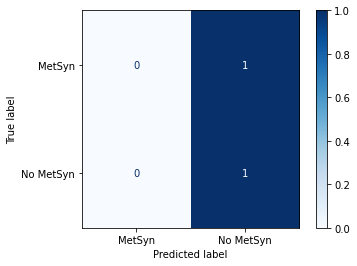

In [217]:
# Dummy Model
ConfusionMatrixDisplay.from_estimator(dummy_model_processor, X_test_processed, y_test, cmap='Blues', normalize='true');

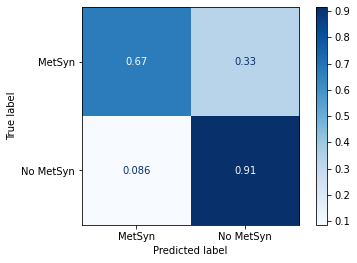

In [218]:
# Logistics Model with L1 tuned
ConfusionMatrixDisplay.from_estimator(best_l1_log_reg_pipe, X_test_processed, y_test, cmap='Blues', normalize='true');

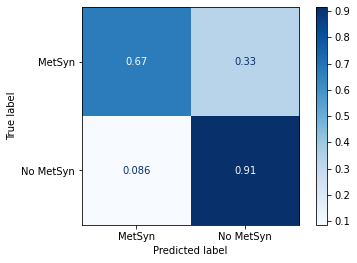

In [219]:
# Logistics Model with L2 tuned
ConfusionMatrixDisplay.from_estimator(best_l2_log_reg_pipe, X_test_processed, y_test, cmap='Blues', normalize='true');

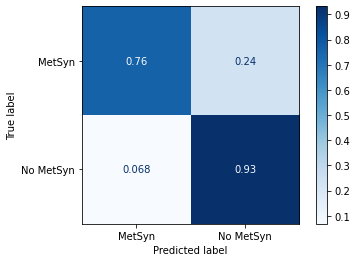

In [220]:
# Random Forest Model
ConfusionMatrixDisplay.from_estimator(ran_for, X_test_processed, y_test, cmap='Blues', normalize='true');

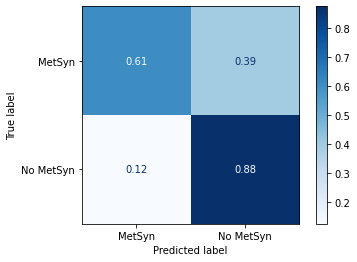

In [221]:
# KNN Model
ConfusionMatrixDisplay.from_estimator(best_knn, X_test_processed, y_test, cmap='Blues', normalize='true');

## **Classification Reports**

In [223]:
# Classification Reports
dummy_classification_report = classification_report(y_test, dummy_test_preds)
ran_for_classification_report = classification_report(y_test, ran_for_test_preds)
best_l1_log_reg_report = classification_report(y_test, best_l1_log_reg_test_preds)
best_l2_log_reg_report = classification_report(y_test, best_l2_log_reg_test_preds)
knn_classification_report = classification_report(y_test, knn_test_preds)
print('\n')
print(f'Dummy Model Classification Report \n{dummy_classification_report}');
print('\n')
print(f'Random Forest Model Classification Report \n{ran_for_classification_report}');
print('\n')
print(f'L1 Tuned Logistics Classification Report \n{best_l1_log_reg_report}');
print('\n')
print(f'L2 Tuned Logistics Classification Report \n{best_l2_log_reg_report}');
print('\n')
print(f'KNN Model Classification Report \n{knn_classification_report}');

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




Dummy Model Classification Report 
              precision    recall  f1-score   support

      MetSyn       0.00      0.00      0.00       204
   No MetSyn       0.66      1.00      0.80       397

    accuracy                           0.66       601
   macro avg       0.33      0.50      0.40       601
weighted avg       0.44      0.66      0.53       601



Random Forest Model Classification Report 
              precision    recall  f1-score   support

      MetSyn       0.85      0.76      0.81       204
   No MetSyn       0.89      0.93      0.91       397

    accuracy                           0.88       601
   macro avg       0.87      0.85      0.86       601
weighted avg       0.87      0.88      0.87       601



L1 Tuned Logistics Classification Report 
              precision    recall  f1-score   support

      MetSyn       0.80      0.67      0.73       204
   No MetSyn       0.84      0.91      0.88       397

    accuracy                           0.83       601
  

## **Findings**

### **Accuracy Scores**

In [224]:
# Print Accuracy Scores
print(f'Dummy Model Train Accuracy Score: {dummy_train_score}')
print(f'Dummy Model Test Accuracy Score: {dummy_test_score}')
print('\n')
print(f'Best L1 Tuned Logistics Regression Train Accuracy Score: {best_l1_log_reg_train_score}')
print(f'Best L1 Tuned Logistics Regression Test Accuracy Score: {best_l1_log_reg_test_score}')
print('\n')
print(f'Best L2 Tuned Logistics Regression Train Accuracy Score: {best_l2_log_reg_train_score}')
print(f'Best L2 Tuned Logistics Regression Test Accuracy Score: {best_l2_log_reg_test_score}')
print('\n')
print(f'Random Forest Train Accuracy Score: {ran_for_train_score}')
print(f'Random Forest Test Accuracy Score: {ran_for_test_score}')
print('\n')
print(f'KNN Train Accuracy Score: {knn_train_score}')
print(f'KNN Test Accuracy Score: {knn_test_score}')

Dummy Model Train Accuracy Score: 0.6566666666666666
Dummy Model Test Accuracy Score: 0.6605657237936772


Best L1 Tuned Logistics Regression Train Accuracy Score: 0.8561111111111112
Best L1 Tuned Logistics Regression Test Accuracy Score: 0.831946755407654


Best L2 Tuned Logistics Regression Train Accuracy Score: 0.8561111111111112
Best L2 Tuned Logistics Regression Test Accuracy Score: 0.831946755407654


Random Forest Train Accuracy Score: 1.0
Random Forest Test Accuracy Score: 0.8752079866888519


KNN Train Accuracy Score: 0.8288888888888889
KNN Test Accuracy Score: 0.7853577371048253




---



## **To Do List**

- xxx
- xxx
- xxx